##### Question 8 -

Using the data from Question 5, write code the analyze the data and answer the following questions
Note -

1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season

● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every seas


In [94]:
import requests

# API link
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Send a GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Extract the show information
    show_info = {
        'id': data['id'],
        'url': data['url'],
        'name': data['name']
    }

    # Extract information for each episode
    episodes = []
    for episode in data['_embedded']['episodes']:
        episode_info = {
            'season': episode['season'],
            'number': episode['number'],
            'type': episode['type'],
            'airdate': episode['airdate'],
            'airtime': episode['airtime'],
            'runtime': episode['runtime'],
            'average_rating': episode['rating']['average'],
            'summary': episode['summary'],
            'medium_image_link': episode['image']['medium'],
            'original_image_link': episode['image']['original']
        }
        episodes.append(episode_info)

    # Print the extracted data
    print("Show Information:")
    for key, value in show_info.items():
        print(f"{key}: {value}")

    print("\nEpisodes:")
    for episode in episodes:
        print("Season:", episode['season'])
        print("Number:", episode['number'])
        print("Type:", episode['type'])
        print("Airdate:", episode['airdate'])
        print("Airtime:", episode['airtime'])
        print("Runtime:", episode['runtime'])
        print("Average Rating:", episode['average_rating'])
        print("Summary:", episode['summary'])
        print("Medium Image Link:", episode['medium_image_link'])
        print("Original Image Link:", episode['original_image_link'])
        print("------------------------")

else:
    print("Failed to retrieve data from the API.")


Show Information:
id: 1371
url: https://www.tvmaze.com/shows/1371/westworld
name: Westworld

Episodes:
Season: 1
Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: <p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
------------------------
Season: 1
Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60
Average Rating: 7.7
Summary: <p>Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herse

In [95]:
import matplotlib.pyplot as plt

# Get all the overall ratings for each season
season_ratings = {}
for episode in episodes:
    season = episode['season']
    rating = episode['average_rating']
    if season not in season_ratings:
        season_ratings[season] = []
    season_ratings[season].append(rating)

In [96]:
season_ratings

{1: [8, 7.7, 7.6, 7.9, 8, 8, 8.6, 7.9, 8.5, 8.7],
 2: [7.8, 7.7, 7.7, 8, 7.6, 7.7, 7.9, 8.7, 8.4, 8.5],
 3: [8, 7.8, 7.8, 8, 7.9, 7.5, 7.5, 7.7],
 4: [7.1, 7.4, 7.6, 7.7, 7.8, 7.5, 7.7, 7.5]}

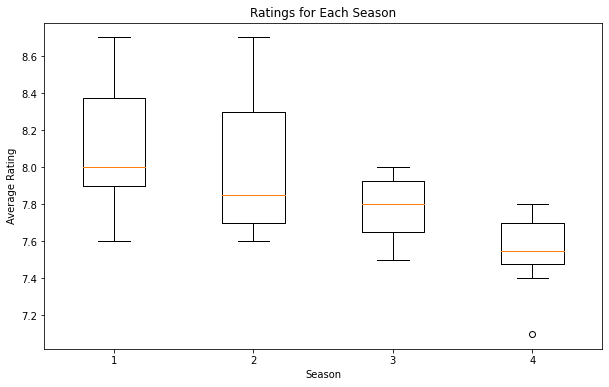

In [98]:
# Plot the ratings for each season
seasons = sorted(season_ratings.keys())
ratings = [season_ratings[season] for season in seasons]

plt.figure(figsize=(10, 6))
plt.boxplot(ratings, labels=seasons)
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Ratings for Each Season')
plt.show()

In [103]:
# Get all the episode names whose average rating is more than 8 for every season
highly_rated_episodes = []
for episode in episodes:
    if episode['average_rating'] > 8.0:
        highly_rated_episodes.append(episode)


In [104]:
highly_rated_episodes

[{'season': 1,
  'number': 7,
  'type': 'regular',
  'airdate': '2016-11-13',
  'airtime': '21:00',
  'runtime': 60,
  'average_rating': 8.6,
  'summary': '<p>While William and Dolores travel to the unclaimed territories, Charlotte and Theresa make plans to force Robert out of the park using Clementine. Meanwhile, Maeve continues her plans to escape Westworld.</p>',
  'medium_image_link': 'https://static.tvmaze.com/uploads/images/medium_landscape/83/209400.jpg',
  'original_image_link': 'https://static.tvmaze.com/uploads/images/original_untouched/83/209400.jpg'},
 {'season': 1,
  'number': 9,
  'type': 'regular',
  'airdate': '2016-11-27',
  'airtime': '21:00',
  'runtime': 60,
  'average_rating': 8.5,
  'summary': '<p>Bernard forces Robert to take him back into his own memories, while the Man meets with Charlotte. Meanwhile, Dolores escapes the Confederado camp and William gives Logan new orders.</p>',
  'medium_image_link': 'https://static.tvmaze.com/uploads/images/medium_landscape/8

In [105]:
# Count the number of highly rated episodes for each season
season_high_ratings = {}
for episode in episodes:
    season = episode['season']
    rating = episode['average_rating']
    if rating > 8.0:
        if season not in season_high_ratings:
            season_high_ratings[season] = 0
        season_high_ratings[season] += 1

In [106]:
season_high_ratings

{1: 3, 2: 3}

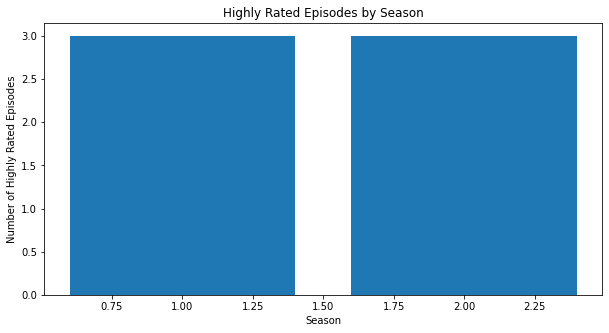

In [115]:
# data for plotting
seasons = list(season_high_ratings.keys())
high_ratings_count = list(season_high_ratings.values())

# Plot the bar chart
plt.figure(figsize=(10,5))
plt.bar(seasons, high_ratings_count)
plt.xlabel('Season')
plt.ylabel('Number of Highly Rated Episodes')
plt.title('Highly Rated Episodes by Season')
plt.show()